# Gradient Boosting:

In [1]:
#Import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
#Example data:
data = {
    'Age': [25, 45, 35, 50, 23, 37, 32, 28, 40, 27],
    'Income': [50000, 60000, 70000, 80000, 20000, 30000, 40000, 55000, 65000, 75000],
    'Years_Experience': [1, 20, 10, 25, 2, 5, 7, 3, 15, 12],
    'Loan_Approved': [0, 1, 1, 1, 0, 0, 1, 0, 1, 1]
}

In [4]:
#create Dataframe:
df = pd.DataFrame(data)

In [5]:
df

,Age,Income,Years_Experience,Loan_Approved
0,25,50000,1,0
1,45,60000,20,1
2,35,70000,10,1
3,50,80000,25,1
4,23,20000,2,0
5,37,30000,5,0
6,32,40000,7,1
7,28,55000,3,0
8,40,65000,15,1
9,27,75000,12,1


In [6]:
#split the dta into X(feature) and y(target):
x = df[["Age", "Income", "Years_Experience"]]
y = df["Loan_Approved"]

In [7]:
x

,Age,Income,Years_Experience
0,25,50000,1
1,45,60000,20
2,35,70000,10
3,50,80000,25
4,23,20000,2
5,37,30000,5
6,32,40000,7
7,28,55000,3
8,40,65000,15
9,27,75000,12


In [8]:
y

0    0
1    1
2    1
3    1
4    0
5    0
6    1
7    0
8    1
9    1
Name: Loan_Approved, dtype: int64

In [9]:
#Seperate the data into training and testing:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=12)

In [10]:
#Train the model:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
                                  max_depth=3, random_state=12)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=12)

In [11]:
#predict the model:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1], dtype=int64)

In [12]:
#Evalute the model:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.3333333333333333


In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: {conf_matrix}")

Confusion Matrix: [[0 2]
 [0 1]]


In [14]:
class_report = classification_report(y_test, y_pred)
print(f"Classification Report: {class_report}")

Classification Report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



In [16]:
#Feature Imporatnce:
feature_importances = pd.DataFrame(model.feature_importances_, index=x.columns,
                                  columns=["Importance"]).sort_values("Importance", ascending=False)
print(f"Feature Importance: \n{feature_importances}")

Feature Importance: 
                  Importance
Age                 0.838914
Years_Experience    0.161086
Income              0.000000


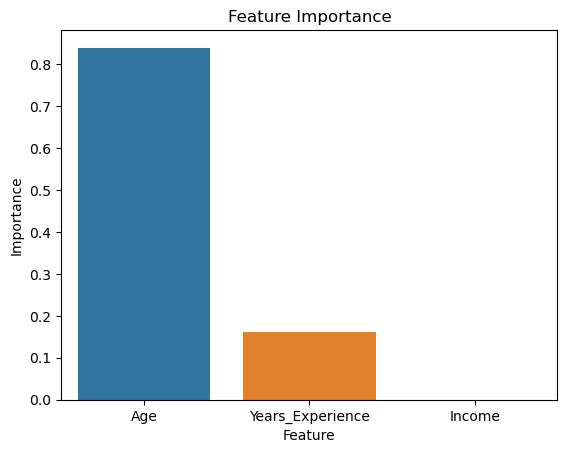

In [17]:
#plot the graph:
sns.barplot(x=feature_importances.index, y=feature_importances["Importance"])
plt.title("Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()